<a href="https://colab.research.google.com/github/ventus550/HandwritingRecognition/blob/master/notebooks/test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Init

In [1]:
try:
    from google.colab import drive
    drive.mount('/content/mount', force_remount=True)
    %cd mount/MyDrive/MachineLearningProjects/HandwritingRecognition/notebooks
except ModuleNotFoundError: ...

Mounted at /content/mount
/content/mount/MyDrive/MachineLearningProjects/HandwritingRecognition/notebooks


In [2]:
import os, sys
sys.path.append("..")

In [3]:
import keras
from keras.layers import *
import tensorflow as tf

import numpy as np
from scipy import ndimage
from pathlib import Path
from matplotlib import pyplot as plt

import utils

## Configuration

In [4]:
BASEDIR = Path().absolute().parent
DESTDIR = BASEDIR / "data"
MODLDIR = BASEDIR / "models"
DATASET = DESTDIR / "words.npz"
model_name = "hr.h5"

## Load model

In [5]:
model = utils.load(MODLDIR / model_name)
print(model.meta)

{'name': 'model', 'epochs': 50, 'characters': '!"#&\'()*+,-./0123456789:;?ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz', 'padding': 99, 'maxlen': 21}


## Test predictions

In [6]:
from google.colab import files
from itertools import groupby

characters = list(model.meta["characters"])

def preprocess_image(image_path):
    image = tf.io.read_file(image_path)
    image = tf.image.decode_png(image, 1)
    image = tf.cast(image, tf.float32) / 255.0
    return image

def upload_and_predict():
    img = files.upload()
    path = list(img.keys())[0]
    image = preprocess_image(path)

    preds = model.predict(tf.expand_dims(image, 0))
    label = utils.ctc_decode(characters, preds[0])

    plt.imshow(image, cmap="gray")
    plt.title(label)


Saving hey2.png to hey2 (6).png
1/1 [==============================] - 2s 2s/step


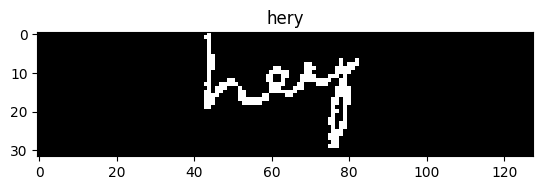

In [7]:
upload_and_predict()